In [56]:
import pandas as pd
import numpy as np
from Model_Functions import Filtered_Data
from Model_Functions import Discretize, Probability_Matrix, Probability_Nsteps, Random_Walk, Plot_Random_Walk, Montecarlo_Simulation
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('../data/Final_Data.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10820 entries, 0 to 10819
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10820 non-null  object 
 1   Name            10820 non-null  object 
 2   Email           10820 non-null  object 
 3   Position        10820 non-null  object 
 4   Seniority       10820 non-null  object 
 5   Location        10820 non-null  object 
 6   Studio          10820 non-null  object 
 7   Client          10820 non-null  object 
 8   Client Tag      10820 non-null  object 
 9   Project         10820 non-null  object 
 10  Project Tag     10820 non-null  object 
 11  Team Name       10820 non-null  object 
 12  Email Leader    9685 non-null   object 
 13  Year            10820 non-null  int64  
 14  Month           10820 non-null  int64  
 15  Day             10820 non-null  int64  
 16  Date_timestamp  10820 non-null  object 
 17  Engagement      10820 non-null 

In [59]:
data.drop(columns=['Email'], inplace=True)

In [60]:
data.info()

q1 = np.quantile(data['Engagement'],q=.25)
q2 = np.quantile(data['Engagement'],q=.50)
q3 = np.quantile(data['Engagement'],q=.75)
q4 = np.quantile(data['Engagement'],q=1)

quantiles = [0,q1,q2,q3,q4]

quantiles = np.array(quantiles)

print(quantiles)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10820 entries, 0 to 10819
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10820 non-null  object 
 1   Name            10820 non-null  object 
 2   Position        10820 non-null  object 
 3   Seniority       10820 non-null  object 
 4   Location        10820 non-null  object 
 5   Studio          10820 non-null  object 
 6   Client          10820 non-null  object 
 7   Client Tag      10820 non-null  object 
 8   Project         10820 non-null  object 
 9   Project Tag     10820 non-null  object 
 10  Team Name       10820 non-null  object 
 11  Email Leader    9685 non-null   object 
 12  Year            10820 non-null  int64  
 13  Month           10820 non-null  int64  
 14  Day             10820 non-null  int64  
 15  Date_timestamp  10820 non-null  object 
 16  Engagement      10820 non-null  float64
dtypes: float64(1), int64(3), object

In [61]:
data

,Date,Name,Position,Seniority,Location,Studio,Client,Client Tag,Project,Project Tag,Team Name,Email Leader,Year,Month,Day,Date_timestamp,Engagement
0,10Apr23,Alberto Bravo,Data Analyst,Ssr,AR/CABA/BA,Data,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,pedro.rodriguez@tec.globant.com,2023,4,10,2023-04-10,2.30
1,10Apr23,Alberto Cordero,Project Manager,Sr Level 1,CL/RM/SCL,Delivery,HealthSphere Technologies,HSTGIE,Horizon Expansion,HOREXP,Finding Nemo's Friends,NaN,2023,4,10,2023-04-10,5.00
2,10Apr23,Alberto Ramírez,Project Manager,Sr Level 1,CO/CUN/BOG,Delivery,TechNova Solutions,TECNVS,Nexus Development,NEXDEV,The Great Catsby,NaN,2023,4,10,2023-04-10,2.44
3,10Apr23,Alberto Sánchez,Software Developer,Sr Level 1,CO/CUN/BOG,Engineering,EduSmart Systems,EDUSYS,Vanguard Initiative,VGRDIN,The Matrix Mice,carlos.ortega@tec.globant.com,2023,4,10,2023-04-10,3.29
4,10Apr23,Ana Aguayo,Business Analyst,Ssr,MX/CDMX/CDMX,Product,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,ana.gomez@tec.globant.com,2023,4,10,2023-04-10,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,9May23,Valeria Castañeda,Software Developer,Jr,AR/CABA/BA,Engineering,TechNova Solutions,TECNVS,Nexus Development,NEXDEV,The Great Catsby,alberto.ramirez@tec.globant.com,2023,5,9,2023-05-09,4.64
10816,9May23,Valeria Montoya,Database Administrator,Sr Level 2,MX/CDMX/CDMX,Cloud Ops,EduSmart Systems,EDUSYS,Catalyst Program,CATPRO,Star Wars: The Furry Awakens,pedro.rodriguez@tec.globant.com,2023,5,9,2023-05-09,3.49
10817,9May23,Valeria Morales,Software Developer,Ssr,CO/CUN/BOG,Engineering,EcoBuild Enterprises,EBEPRI,Echo System,ECOSYS,Fight Club Penguin,cristian.bravo@tec.globant.com,2023,5,9,2023-05-09,2.79
10818,9May23,Valeria Ponce,Software Developer,Sr Level 1,AR/CABA/BA,Engineering,EcoBuild Enterprises,EBEPRI,Odyssey Quest,ODYQST,Paws and Recreation,valeria.ponce@tec.globant.com,2023,5,9,2023-05-09,3.41


In [62]:
my_filters = {
    "Project": "Vanguard Initiative",
    "Position": "Data Analyst"
}


prueba = Filtered_Data(data,['Project','Position'],my_filters)

In [63]:
prueba

,Project,Position,Engagement
Date_timestamp,,,
2023-01-02,Vanguard Initiative,Data Analyst,2.39
2023-01-03,Vanguard Initiative,Data Analyst,1.89
2023-01-04,Vanguard Initiative,Data Analyst,2.68
2023-01-05,Vanguard Initiative,Data Analyst,1.99
2023-01-06,Vanguard Initiative,Data Analyst,2.47
...,...,...,...
2023-06-26,Vanguard Initiative,Data Analyst,0.43
2023-06-27,Vanguard Initiative,Data Analyst,0.43
2023-06-28,Vanguard Initiative,Data Analyst,3.27


In [64]:
'''
filtros = {
    'Team Name': 'Jurassic Bark'
}
prueba = Filtered_Data2(data, filtros )
prueba.sort_values(['Name','Date_timestamp'])
'''

"\nfiltros = {\n    'Team Name': 'Jurassic Bark'\n}\nprueba = Filtered_Data2(data, filtros )\nprueba.sort_values(['Name','Date_timestamp'])\n"

In [65]:
data_disecret, labels = Discretize(prueba,quantiles)
data_disecret[['State','Engagement']]
labels

array(['0.0-2.52', '2.52-3.06', '3.06-3.6', '3.6-5.0'], dtype='<U9')

In [66]:
sparse_matrix, prob_matrix = Probability_Matrix(data_disecret,labels)
prob_matrix

array([[0.68571429, 0.28571429, 0.02857143, 0.        ],
       [0.68965517, 0.27586207, 0.        , 0.03448276],
       [0.05882353, 0.05882353, 0.64705882, 0.23529412],
       [0.        , 0.        , 0.55555556, 0.44444444]])

In [67]:
Probability_Nsteps(prob_matrix, 20)

array([[0.52713269, 0.22272915, 0.16728706, 0.08285111],
       [0.52623006, 0.22238943, 0.16811795, 0.08326256],
       [0.45833474, 0.19683591, 0.2306174 , 0.11421194],
       [0.44654437, 0.19239841, 0.24147076, 0.11958646]])

In [68]:
import pydtmc as dtmc

In [69]:
mc = dtmc.MarkovChain(prob_matrix, states=labels.tolist())

In [70]:
print(f"Is Ergodic? {mc.is_ergodic}")
print(f"Steady State: {mc.steady_states[0]}")
print(f"Mean First Passage Times:\n {mc.mean_first_passage_times_to}")

# 4. Predict next steps easily
next_step_dist = Random_Walk(prob_matrix,1,100)


Is Ergodic? True
Steady State: [0.50670904 0.21504237 0.18608757 0.09216102]
Mean First Passage Times:
 <bound method MarkovChain.mean_first_passage_times_to of MarkovChain>


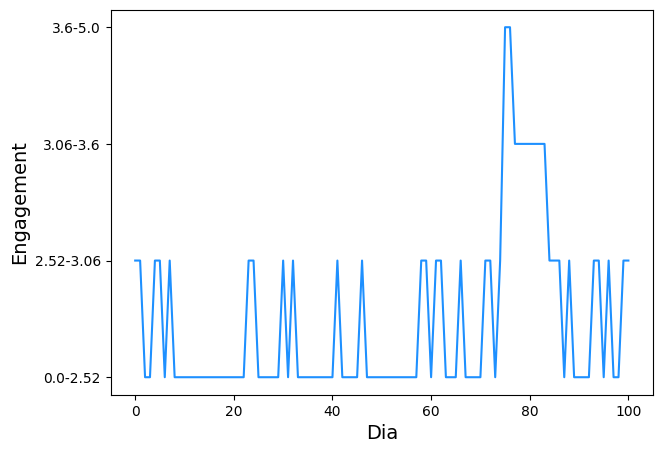

In [71]:
Plot_Random_Walk(next_step_dist, labels)

Test for Montecarlo Simulation

In [72]:
my_filters = {
    "Project": "Vanguard Initiative",
    "Position": "Data Analyst"
}


prueba = Filtered_Data(data,['Project','Position'],my_filters)

data_discret, labels = Discretize(prueba,quantiles)

train_size = int(len(data_discret) * 0.8)
data_train_discret = data_discret.iloc[:train_size].copy()
data_test_discret = data_discret.iloc[train_size:].copy()

sparse_matrix, prob_matrix = Probability_Matrix(data_train_discret,labels)


mc = dtmc.MarkovChain(prob_matrix, states=labels.tolist())

print(f"Is Ergodic? {mc.is_ergodic}")
print(f"Steady State: {mc.steady_states[0]}")

data_discret


Is Ergodic? False
Steady State: [0.  0.  0.8 0.2]


,Project,Position,Engagement,State
Date_timestamp,,,,
2023-01-02,Vanguard Initiative,Data Analyst,2.39,0.0-2.52
2023-01-03,Vanguard Initiative,Data Analyst,1.89,0.0-2.52
2023-01-04,Vanguard Initiative,Data Analyst,2.68,2.52-3.06
2023-01-05,Vanguard Initiative,Data Analyst,1.99,0.0-2.52
2023-01-06,Vanguard Initiative,Data Analyst,2.47,0.0-2.52
...,...,...,...,...
2023-06-26,Vanguard Initiative,Data Analyst,0.43,0.0-2.52
2023-06-27,Vanguard Initiative,Data Analyst,0.43,0.0-2.52
2023-06-28,Vanguard Initiative,Data Analyst,3.27,3.06-3.6


In [73]:
acc, acc_mean = Montecarlo_Simulation(data_train_discret,data_test_discret,prob_matrix,labels,1000)

In [74]:
print(acc_mean)

0.4560769230769231
